# Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/Othercomputers/Il mio laptop/INCO - Data Analytics/Week 6/Final Assignment/data"
sps = pd.read_excel(path+"/Software Professionals Salary.xlsx")

In [ ]:
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
sps.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore,Full Time,Android
7,3.1,Samsung R&D Institute India - Bangalore,Android Developer,400000,3,Bangalore,Full Time,Android
8,3.7,DXMinds Technologies,Android Developer,300000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android


1. What is the shape (rows, cols) of the `sps` DataFrame?

1. **sps has 22770 rows and 8 columns**

In [ ]:
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset?

2. **There are 11 different job roles in the dataset**

In [ ]:
sps['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [ ]:
len(sps['Job Roles'].unique())

11

3. How many unique `Job Title` are there for the "Python" `Job Role`?

3. **There are 102 distinct job title for 'Python' Job Role**

In [ ]:
sps[sps['Job Roles'] == "Python"]['Job Title'].unique()

array(['Python Developer', 'Python Developer - Intern',
       'Python Developer - Contractor', 'Python Developer Contractor',
       'Senior Python Developer', 'Junior Python Developer',
       'Python/Django Developer', 'Systems Developer/Python Developer',
       'Python', 'Python Programmer',
       'Senior Python Developer - Contractor',
       'Junior Python Developer - Intern',
       'Junior Python Developer Contractor',
       'Python/Django Developer - Intern',
       'Python/Django Developer - Contractor',
       'Systems Developer/Python Developer - Intern',
       'Python/Odoo Developer', 'Python Programmer - Intern',
       'Python Full Stack Developer',
       'Python Full Stack Developer - Intern',
       'Full Stack Python Developer', 'Python Engineer',
       'Junior Python/Django Developer', 'Python Web Developer',
       'Middle Python Developer', 'Lead Python Developer',
       'As A Python Developer', 'Python AI Developer',
       'Python AI Developer - Intern', '

In [ ]:
len(sps[sps['Job Roles'] == "Python"]['Job Title'].unique())

102

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

4.  **3 companies has a Python Jobe Role with a Job Title that contains "Analyst" substring**

In [ ]:
python_df = sps[(sps['Job Roles'] == "Python")][['Company Name','Job Title']]

In [ ]:
import re

In [ ]:
p = re.compile(r"Analyst")

In [ ]:
counter = 0
for i in python_df.index:
  if p.search(python_df['Job Title'][i]) != None:
    counter += 1

print(counter)

3


In [ ]:
#to avoid duplicates, we can add companies compliant match in a set. Set doesn't accept duplicates by definition
company_set = set()

for i in python_df.index:
  if p.search(python_df['Job Title'][i]) != None:
    company_set.add(python_df['Company Name'][i])

print(company_set)
print(f"Result is {len(company_set)}")

{'Infosys', 'Ocwen Financial', 'TrioHats Consulting'}
Result is 3


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

5. **Amazon is the companies with highest number of salaries reported across all job title**

In [ ]:
salrep_for_companies = sps.groupby(['Company Name'], as_index=False)['Salaries Reported'].sum()
salrep_for_companies.sort_values('Salaries Reported', ascending = False, inplace = True)

salrep_for_companies


,Company Name,Salaries Reported
660,Amazon,2636
4486,Infosys,2032
9161,Tata Consultancy Services,1286
313,Accenture,894
10401,Wipro,651
...,...,...
4409,IndiaTechSoft,1
4408,IndiaProperty,1
4407,IndiaNivesh,1
4404,IndiaFilings.com,1


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in?

6. **Amazon is present in 9 locations**

In [ ]:
sps[sps['Company Name']=="Amazon"]['Location'].unique()

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Pune', 'Mumbai',
       'Kolkata', 'Jaipur', 'Madhya Pradesh'], dtype=object)

In [ ]:
len(sps[sps['Company Name']=="Amazon"]['Location'].unique())

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [ ]:
import requests

In [ ]:
r = requests.get("https://open.er-api.com/v6/latest/USD")
print(r.status_code)

200


In [ ]:
r.json()

{'result': 'success',
 'provider': 'https://www.exchangerate-api.com',
 'documentation': 'https://www.exchangerate-api.com/docs/free',
 'terms_of_use': 'https://www.exchangerate-api.com/terms',
 'time_last_update_unix': 1686873751,
 'time_last_update_utc': 'Fri, 16 Jun 2023 00:02:31 +0000',
 'time_next_update_unix': 1686961261,
 'time_next_update_utc': 'Sat, 17 Jun 2023 00:21:01 +0000',
 'time_eol_unix': 0,
 'base_code': 'USD',
 'rates': {'USD': 1,
  'AED': 3.6725,
  'AFN': 86.042722,
  'ALL': 99.446215,
  'AMD': 386.874442,
  'ANG': 1.79,
  'AOA': 700.973111,
  'ARS': 247.675697,
  'AUD': 1.456795,
  'AWG': 1.79,
  'AZN': 1.69827,
  'BAM': 1.791158,
  'BBD': 2,
  'BDT': 109.113912,
  'BGN': 1.792954,
  'BHD': 0.376,
  'BIF': 2812.863861,
  'BMD': 1,
  'BND': 1.339031,
  'BOB': 6.921367,
  'BRL': 4.8134,
  'BSD': 1,
  'BTN': 82.048479,
  'BWP': 13.372154,
  'BYN': 2.852008,
  'BZD': 2,
  'CAD': 1.325404,
  'CDF': 2278.237994,
  'CHF': 0.893709,
  'CLP': 802.47135,
  'CNY': 7.13161,
  '

In [ ]:
exchange_dict = r.json()['rates']


In [ ]:
sps['Salary USD'] = round(sps['Salary'] / exchange_dict['INR'])

In [ ]:
sps['Salary USD'] = sps['Salary USD'].astype(int)

In [ ]:
sps.head(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
19813,3.3,Infosys,Test Engineer,1104000,361,Hyderabad,Full Time,Testing,13455
12342,3.8,Amazon,Software Development Engineer,5700000,353,Bangalore,Full Time,SDE,69471
20773,3.3,Infosys,Test Engineer,100000,331,Bangalore,Full Time,Testing,1219
12294,3.8,Amazon,Software Development Engineer (SDE),1188000,291,Bangalore,Full Time,SDE,14479
20344,3.3,Infosys,Test Analyst,852000,280,Hyderabad,Full Time,Testing,10384


8. What is the average `Salary USD` for the "Python" `Job Role`?

8. **The average USD salary for Python Job Role is 5924 $**

In [ ]:
python_df = sps[sps['Job Roles']=="Python"]


In [ ]:
avg_salary = python_df['Salary USD'].mean().round()
print(avg_salary)

5924.0


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s?

9.  **Thapar University has the highest average Salary USD across all Job Titles**

In [ ]:
avgsalary_for_companies = sps.groupby(['Company Name'], as_index=False)['Salary USD'].mean()

avgsalary_for_companies = avgsalary_for_companies.rename(columns={'Salary USD': 'Average Salary'})

In [ ]:
avgsalary_for_companies.sort_values('Average Salary', ascending = False, inplace = True)
avgsalary_for_companies

,Company Name,Average Salary
9414,Thapar University,1096910.0
2665,Digital Raju,119441.0
3182,FFF Enterprises,119441.0
3565,Gaana Lyrics Point.com,118223.0
3534,GGH Heavy Industries,117004.0
...,...,...
548,Al-Jazirah,146.0
341,Acmatics Technologies,146.0
9,....,146.0
10316,Webboombaa,146.0


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

10. **Looking at the plot, there is one point outside the distribution that has an average salary strongly above the average salary distribution. The company is Thapar University** . An expert could have already noticed the oddity in the answer to question 9

In [ ]:
sns.set_theme()

In [ ]:
mean_salary_by_company = sps.groupby(['Company Name'])['Salary USD'].mean().round()
mean_rating_by_company = sps.groupby(['Company Name'])['Rating'].mean()

In [ ]:
mean_data_for_companies= pd.DataFrame({'Mean Salary': mean_salary_by_company, 'Mean Rating': mean_rating_by_company}).reset_index()
mean_data_for_companies.head()

,Company Name,Mean Salary,Mean Rating
0,10,8337.0,4.0
1,700,8483.0,3.9
2,1985,3803.0,3.3
3,2018,8629.0,3.8
4,17544,23157.0,3.9


<Axes: xlabel='Mean Rating', ylabel='Mean Salary'>

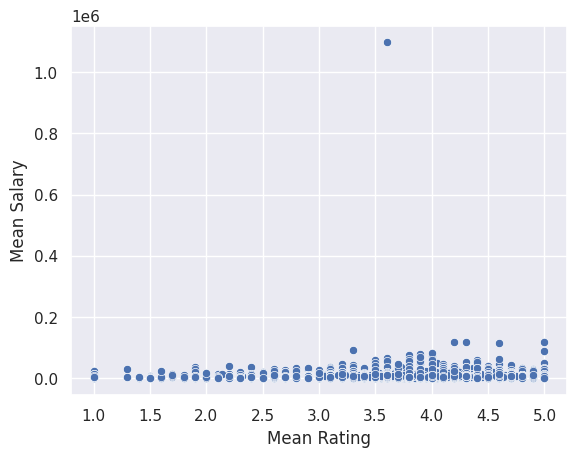

In [ ]:
sns.scatterplot(data=mean_data_for_companies, x="Mean Rating", y="Mean Salary")

In [ ]:
mean_data_for_companies[mean_data_for_companies['Mean Salary']>1000000]

,Company Name,Mean Salary,Mean Rating
9414,Thapar University,1096910.0,3.6
